Text(0.5, 1.0, 'Magnetic Flux')

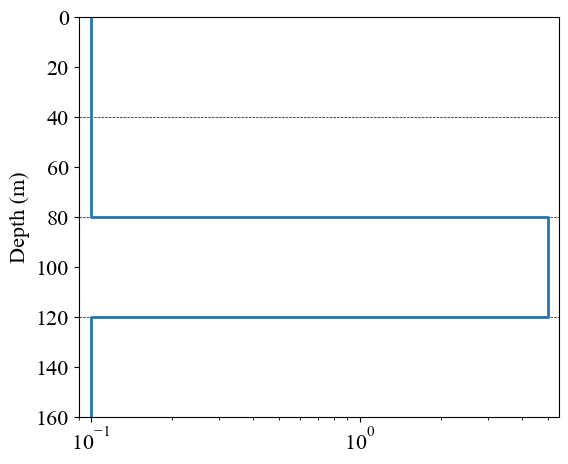

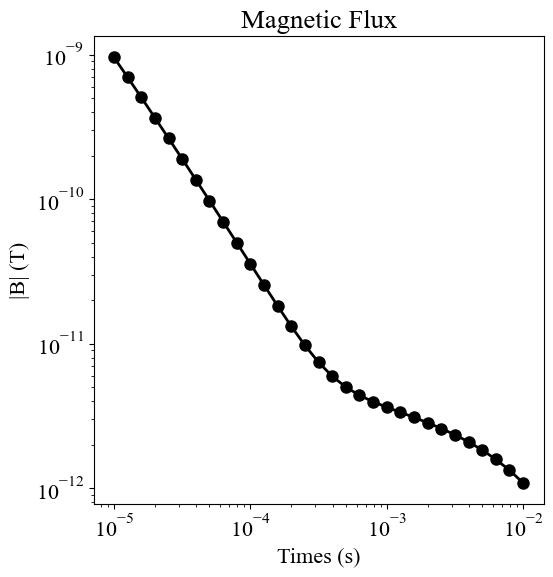

In [69]:
import numpy as np
import os
from matplotlib import pyplot as plt

from SimPEG import maps
import SimPEG.electromagnetics.time_domain as tdem
from SimPEG.utils import plot_1d_layer_model

write_output = False
plt.rcParams.update({"font.size": 16})

# sphinx_gallery_thumbnail_number = 2
# Source properties
source_location = np.array([0.0, 0.0, 1.0])
source_orientation = "z"  # "x", "y" or "z"
source_current = 1.0  # maximum on-time current
source_radius = 6.0  # source loop radius

# Receiver properties
receiver_location = np.array([0.0, 0.0, 1.0])
receiver_orientation = "z"  # "x", "y" or "z"
times = np.logspace(-5, -2, 31)  # time channels (s)

# Define receiver list. In our case, we have only a single receiver for each source.
# When simulating the response for multiple component and/or field orientations,
# the list consists of multiple receiver objects.
receiver_list = []
receiver_list.append(
    tdem.receivers.PointMagneticFluxDensity(
        receiver_location, times, orientation=receiver_orientation
    )
)

# Define the source waveform. Here we define a unit step-off. The definition of
# other waveform types is covered in a separate tutorial.
waveform = tdem.sources.StepOffWaveform()

# Define source list. In our case, we have only a single source.
source_list = [
    tdem.sources.CircularLoop(
        receiver_list=receiver_list,
        location=source_location,
        waveform=waveform,
        current=source_current,
        radius=source_radius,
    )
]

# Define the survey
survey = tdem.Survey(source_list)
# Physical properties
background_conductivity = 1e-1
layer_conductivity = 5

# Layer thicknesses
thicknesses = np.array([40.0, 40.0, 40])
n_layer = len(thicknesses) + 1

# physical property models
model = background_conductivity * np.ones(n_layer)
model[2] = layer_conductivity

# Define a mapping for conductivities
model_mapping = maps.IdentityMap(nP=n_layer)

# Plot conductivity moimport numpy as np
from matplotlib import pyplot as plt

from SimPEG import maps
import SimPEG.electromagnetics.time_domain as tdem
from SimPEG.utils import plot_1d_layer_model
source_location = np.array([0.0, 0.0, 0.5])
source_orientation = "z"
current_amplitude = 3.0
source_radius = 10.0

receiver_location = np.array([0.0, 0.0, 0.5])
receiver_orientation = "z"
times = np.logspace(-6, 2, 61)
receiver_list = [
    tdem.receivers.PointMagneticFluxDensity(receiver_location, times, orientation=receiver_orientation),
    tdem.receivers.PointMagneticFluxTimeDerivative(receiver_location, times, orientation=receiver_orientation)
]
waveform = tdem.sources.StepOffWaveform()
source_list = [
    tdem.sources.CircularLoop(
        receiver_list=receiver_list,
        location=source_location,
        waveform=waveform,
        current=current_amplitude,
        radius=source_radius
    )
]
survey = tdem.Survey(source_list)
thicknesses = np.array([40.0, 40.0, 40, 40, 40, 40, 40])  # four layers
n_layer = len(thicknesses) + 1
sigma = 0.1
sigma_model = sigma * np.ones(n_layer)
sigma_model[2] = 5.0  
sigma_model[6] = 5.0
eta = 0.3  
tau = 0.01 
c = 0.75  
eta_model = eta * np.ones(n_layer)
tau_model = tau * np.ones(n_layer)
c_model = c * np.ones(n_layer)
model_mapping = maps.IdentityMap(nP=n_layer)
simulation_conductive = tdem.Simulation1DLayered(
    survey=survey,
    thicknesses=thicknesses,
    sigmaMap=model_mapping
)
dpred_conductive = simulation_conductive.dpred(sigma_model)
simulation_chargeable = tdem.Simulation1DLayered(
    survey=survey,
    thicknesses=thicknesses,
    sigmaMap=model_mapping,
    eta=eta,
    tau=tau,
    c=c
)
dpred_chargeable = simulation_chargeable.dpred(sigma_model)
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_axes([0.1, 0.1, 0.25, 0.8])
ax1.loglog(times, np.abs(dpred_conductive[0:len(times)]), "k", lw=3)
ax1.loglog(times, np.abs(dpred_chargeable[0:len(times)]), "r", lw=3)
ax1.set_xlim([times.min(), times.max()])
ax1.grid()
ax1.legend(["Purely Inductive", "Chargeable"])
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("|B| (T)")
ax1.set_title("Magnetic Flux")
ax2 = fig.add_axes([0.42, 0.1, 0.25, 0.8])
ax2.loglog(times, np.abs(dpred_conductive[len(times):]), "k", lw=3)
ax2.loglog(times, np.abs(dpred_chargeable[len(times):]), "r", lw=3)
ax2.set_xlim([times.min(), times.max()])
ax2.grid()
ax2.legend(["Purely Inductive", "Chargeable"])
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("|dB/dt| (T/s)")
ax2.set_title("Time-Derivative of Magnetic Flux")
ax3 = fig.add_axes([0.74, 0.1, 0.2, 0.8])
plot_1d_layer_model(thicknesses, sigma_model, ax=ax3, show_layers=True)
ax3.set_title("True Conductivity Model")

plt.show()del
thicknesses_for_plotting = np.r_[thicknesses, 40.0]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_axes([0.15, 0.15, 0.8, 0.8])
plot_1d_layer_model(thicknesses_for_plotting, model, ax=ax, show_layers=True)
#plt.gca().invert_yaxis()
# Define the simulation
simulation = tdem.Simulation1DLayered(
    survey=survey,
    thicknesses=thicknesses,
    sigmaMap=model_mapping,
)

# Predict data for a given model
dpred = simulation.dpred(model)

# Plot sounding
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.2, 0.15, 0.75, 0.78])
ax.loglog(times, dpred, "k-o", lw=2)
ax.set_xlabel("Times (s)")
ax.set_ylabel("|B| (T)")
ax.set_title("Magnetic Flux")


In [70]:
import numpy as np
import os
output_dir = r"C:\Users\sadra\outputs"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
np.random.seed(347)
noise = 0.00 * np.abs(dpred) * np.random.rand(len(dpred))
dpred_noisy = dpred + noise
output_file = os.path.join(output_dir, "test07.txt")
np.savetxt(output_file, np.c_[times, dpred_noisy], fmt="%.4e", header="TIME BZ")
print(f"Data saved to: {output_file}")


Data saved to: C:\Users\sadra\outputs\test07.txt


C:\Users\sadra\AppData\Local\Temp\ipykernel_268\1217776775.py:102: FutureWarning: reference_model.mref has been deprecated, please use reference_model. It will be removed in version 0.19.0 of SimPEG.
  reg.mref = starting_model



                        SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
                        ***Done using same Solver, and solver_opts as the Simulation1DLayered problem***
                        
model has any nan: 0
=============================== Projected GNCG ===============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  3.58e+03  1.85e+03  0.00e+00  1.85e+03    2.86e+02      0              
   1  1.79e+03  6.91e+01  1.02e-01  2.52e+02    5.88e+01      0              
   2  1.79e+02  3.46e+01  5.03e-02  4.36e+01    1.14e+02      0              
Reached starting chifact with l2-norm regularization: Start IRLS steps...
irls_threshold 4.439693250786151
   3  8.94e+01  8.77e+00  4.62e-02  1.29e+01    9.12e+01      0              
   4  6.36e+02  2.24e-01  4.34e-02  2.78e+01    1.83e+01      0   Skip BFGS  
   5

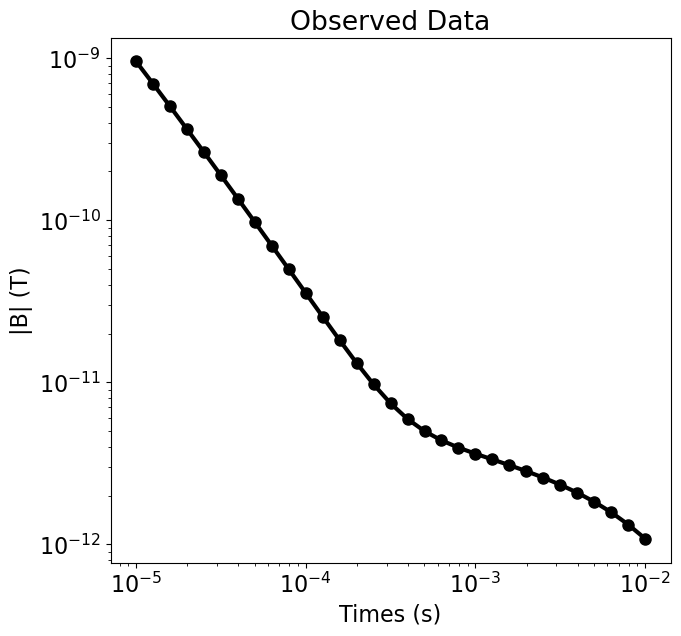

In [1]:
import os
import tarfile
import numpy as np
import matplotlib.pyplot as plt

from discretize import TensorMesh

import SimPEG.electromagnetics.time_domain as tdem

from SimPEG.utils import mkvc, plot_1d_layer_model
from SimPEG import (
    maps,
    data,
    data_misfit,
    inverse_problem,
    regularization,
    optimization,
    directives,
    inversion,
    utils,
)

plt.rcParams.update({"font.size": 16, "lines.linewidth": 2, "lines.markersize": 8})

# sphinx_gallery_thumbnail_number = 2
data_filename = "test07.txt"
# Load field data
dobs = np.loadtxt(str(data_filename), skiprows=1)

times = dobs[:, 0]
dobs = mkvc(dobs[:, -1])

fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0.15, 0.15, 0.8, 0.75])
ax.loglog(times, np.abs(dobs), "k-o", lw=3)
ax.set_xlabel("Times (s)")
ax.set_ylabel("|B| (T)")
ax.set_title("Observed Data")
# Source loop geometry
source_location = np.array([0.0, 0.0, 1.0])
source_orientation = "z"  # "x", "y" or "z"
source_current = 1.0  # peak current amplitude
source_radius = 6.0  # loop radius

# Receiver geometry
receiver_location = np.array([0.0, 0.0, 1.0])
receiver_orientation = "z"  # "x", "y" or "z"

# Receiver list
receiver_list = []
receiver_list.append(
    tdem.receivers.PointMagneticFluxDensity(
        receiver_location, times, orientation=receiver_orientation
    )
)

# Define the source waveform.
waveform = tdem.sources.StepOffWaveform()

# Sources
source_list = [
    tdem.sources.CircularLoop(
        receiver_list=receiver_list,
        location=source_location,
        waveform=waveform,
        current=source_current,
        radius=source_radius,
    )
]

# Survey
survey = tdem.Survey(source_list)
# 5% of the absolute value
uncertainties = 0.05 * np.abs(dobs) * np.ones(np.shape(dobs))

# Define the data object
data_object = data.Data(survey, dobs=dobs, standard_deviation=uncertainties)
# Layer thicknesses
inv_thicknesses = np.logspace(0, 1.5, 25)

# Define a mesh for plotting and regularization.
mesh = TensorMesh([(np.r_[inv_thicknesses, inv_thicknesses[-1]])], "0")
# Define model. A resistivity (Ohm meters) or conductivity (S/m) for each layer.
starting_model = np.log(0.1 * np.ones(mesh.nC))

# Define mapping from model to active cells.
model_mapping = maps.ExpMap()
simulation = tdem.Simulation1DLayered(
    survey=survey, thicknesses=inv_thicknesses, sigmaMap=model_mapping
)
# Define the data misfit. Here the data misfit is the L2 norm of the weighted
# residual between the observed data and the data predicted for a given model.
# The weighting is defined by the reciprocal of the uncertainties.
dmis = data_misfit.L2DataMisfit(simulation=simulation, data=data_object)
dmis.W = 1.0 / uncertainties

# Define the regularization (model objective function)
reg_map = maps.IdentityMap(nP=mesh.nC)
reg = regularization.Sparse(mesh, mapping=reg_map, alpha_s=0.01, alpha_x=1.0)

# set reference model
reg.mref = starting_model

# Define sparse and blocky norms p, q
reg.norms = [1, 0]

# Define how the optimization problem is solved. Here we will use an inexact
# Gauss-Newton approach that employs the conjugate gradient solver.
opt = optimization.ProjectedGNCG(maxIter=25, maxIterLS=20, maxIterCG=30, tolCG=1e-3)
# Define the inverse problem
inv_prob = inverse_problem.BaseInvProblem(dmis, reg, opt)
# Defining a starting value for the trade-off parameter (beta) between the data
# misfit and the regularization.
starting_beta = directives.BetaEstimate_ByEig(beta0_ratio=1e1)
beta = directives.BetaSchedule(coolingFactor=5, coolingRate=2)
# Update the preconditionner
update_Jacobi = directives.UpdatePreconditioner()

# Options for outputting recovered models and predicted data for each beta.
save_iteration = directives.SaveOutputEveryIteration(save_txt=False)

# Directives for the IRLS
update_IRLS = directives.Update_IRLS(
    max_irls_iterations=30, minGNiter=1, coolEpsFact=1.5, update_beta=True
)
# Updating the preconditionner if it is model dependent.
update_jacobi = directives.UpdatePreconditioner()

# Add sensitivity weights
sensitivity_weights = directives.UpdateSensitivityWeights()

# The directives are defined as a list.
directives_list = [
    sensitivity_weights,
    starting_beta,
    beta,
    save_iteration,
    update_IRLS,
    update_jacobi,
]
# Here we combine the inverse problem and the set of directives
inv = inversion.BaseInversion(inv_prob, directives_list)

# Run the inversion
recovered_model = inv.run(starting_model)

(26,)


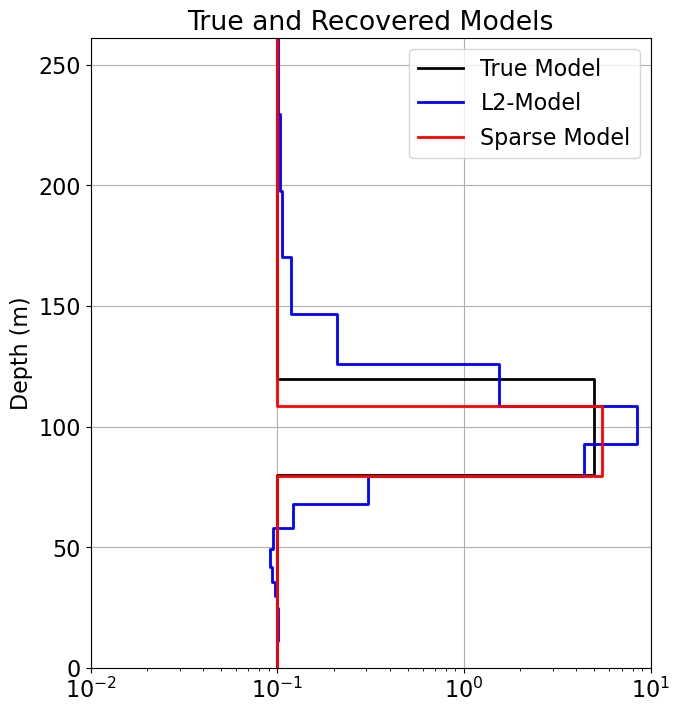

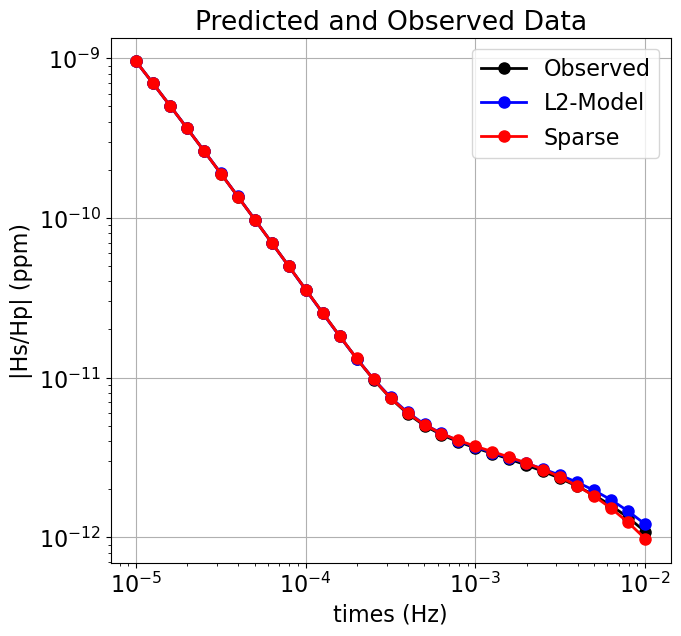

In [2]:
# Load the true model and layer thicknesses
true_model = np.array([0.1, 0.1, 5, 0.1])
true_layers = np.r_[40.0, 40.0, 40, 40]

# Extract Least-Squares model
l2_model = inv_prob.l2model
print(np.shape(l2_model))

# Plot true model and recovered model
fig = plt.figure(figsize=(8, 9))
x_min = np.min(
    np.r_[model_mapping * recovered_model, model_mapping * l2_model, true_model]
)
x_max = np.max(
    np.r_[model_mapping * recovered_model, model_mapping * l2_model, true_model]
)

ax1 = fig.add_axes([0.2, 0.15, 0.7, 0.7])
plot_1d_layer_model(true_layers, true_model, ax=ax1, show_layers=False, color="k")
plot_1d_layer_model(
    mesh.h[0], model_mapping * l2_model, ax=ax1, show_layers=False, color="b"
)
plot_1d_layer_model(
    mesh.h[0], model_mapping * recovered_model, ax=ax1, show_layers=False, color="r"
)
ax1.set_xlim(0.01, 10)
ax1.grid()
ax1.set_title("True and Recovered Models")
ax1.legend(["True Model", "L2-Model", "Sparse Model"])
plt.gca().invert_yaxis()

# Plot predicted and observed data
dpred_l2 = simulation.dpred(l2_model)
dpred_final = simulation.dpred(recovered_model)

fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_axes([0.15, 0.15, 0.8, 0.75])
ax1.loglog(times, np.abs(dobs), "k-o")
ax1.loglog(times, np.abs(dpred_l2), "b-o")
ax1.loglog(times, np.abs(dpred_final), "r-o")
ax1.grid()
ax1.set_xlabel("times (Hz)")
ax1.set_ylabel("|Hs/Hp| (ppm)")
ax1.set_title("Predicted and Observed Data")
ax1.legend(["Observed", "L2-Model", "Sparse"], loc="upper right")
plt.show()